In [1]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read_csv
df = pd.read_csv('Data_for_UCI_named.csv')
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


C:\Users\USER\AppData\Local\Temp\ipykernel_15412\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<AxesSubplot: >

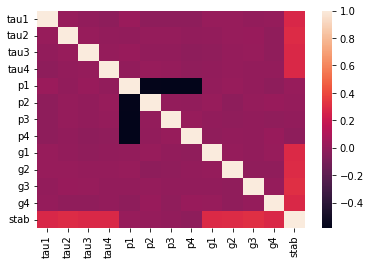

In [4]:
sns.heatmap(df.corr())

In [5]:
pre_df = df.drop(columns=['stab', 'stabf'])
pre_df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923


In [6]:
#normalising features df
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

features_df = pd.DataFrame(scaler.fit_transform(pre_df), columns=pre_df.columns)
features_df.head()


,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,0.258801,0.271561,0.829616,0.976978,0.509244,0.811642,0.495075,0.184572,0.632098,0.852229,0.881531,0.955894
1,0.926793,0.463424,0.268117,0.091471,0.813957,0.039894,0.084809,0.496642,0.382588,0.855215,0.539078,0.770323
2,0.891799,0.878795,0.268005,0.075171,0.425652,0.528367,0.481864,0.719670,0.118990,0.754440,0.831000,0.062980
3,0.022700,0.754704,0.419623,0.193715,0.556118,0.648372,0.040670,0.668412,0.417084,0.975576,0.925677,0.329181
4,0.277230,0.748301,0.467747,0.985065,0.453830,0.582991,0.102655,0.963811,0.786481,0.426782,0.638883,0.811553


In [7]:
target_df = df['stabf']
target_df.head()

0    unstable
1      stable
2    unstable
3    unstable
4    unstable
Name: stabf, dtype: object

In [8]:
#replacing 'stable' and 'unstable' with 1 and 0 respectively
target_df.replace('stable', '1', inplace=True)
target_df.replace('unstable', '0', inplace=True)
target_df.head()

0    0
1    1
2    0
3    0
4    0
Name: stabf, dtype: object

In [9]:
target_df = target_df.astype(int)

In [10]:
target_df.info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: stabf
Non-Null Count  Dtype
--------------  -----
10000 non-null  int32
dtypes: int32(1)
memory usage: 39.2 KB


In [11]:
target_df.value_counts()

0    6380
1    3620
Name: stabf, dtype: int64

In [12]:
#split dateset into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df, target_df, test_size=0.2, random_state = 1)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((8000, 12), (2000, 12), (8000,), (2000,))

### RandomForest

In [13]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train, y_train) 

RandomForestClassifier()

In [24]:
from sklearn.metrics import accuracy_score
y_predictions = model.predict(x_test)

accuracy = accuracy_score(y_test, y_predictions)
accuracy

0.9235

In [15]:
from sklearn.metrics import confusion_matrix
y_predictions = model.predict(x_test)
cm = confusion_matrix(y_test, y_predictions)
cm


array([[1231,   57],
       [  96,  616]], dtype=int64)

Text(69.0, 0.5, 'Truth')

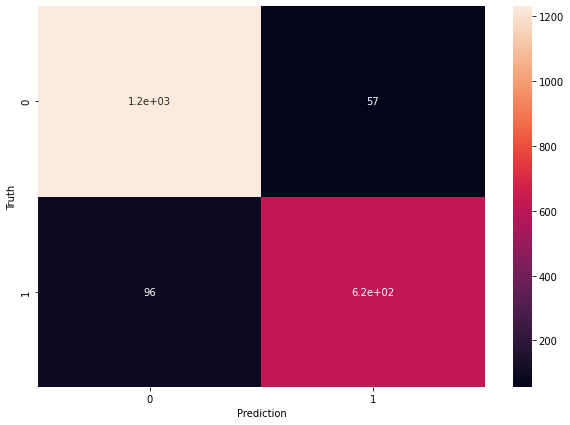

In [16]:
%matplotlib inline
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True)
plt.xlabel('Prediction')
plt.ylabel('Truth')

## ExtraTrees

In [17]:
from sklearn.ensemble import ExtraTreesClassifier
etc_model = ExtraTreesClassifier()

etc_model.fit(x_train, y_train)

ExtraTreesClassifier()

In [18]:
y_pred = etc_model.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

In [19]:
accuracy

0.9205

## XGBoost

In [20]:
import xgboost as xgb

In [21]:
xgb.XGBClassifier()

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [22]:
xgb.XGBClassifier().fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [ ]:
modl = xgb.XGBClassifier()
pred = modl.predict(x_test)
accuracy = accuracy_score(y_test, pred)

## Lightgbm

In [ ]:
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(x_train, y_train)
y_predictions = lgb_model(x_test)

accuracy= accuracy_score(y_test, y_predictions)
